## Fitting activator function parameters to match desired outputs

![](images/7-multi-level-activation.png)

Let's revisit the multi-level activation notebook, where we activate three different genes at three different concentrations.

But, this time, let's not specify any parameters for the various functions. Instead, let's lay out our _desired_ time course and tell dinkum to figure out what parameters to use. The only thing we need to do is tell it what activator functions we want.

In [1]:
import dinkum
from dinkum.vfg import Gene, Receptor, Ligand
from dinkum.vfn import Tissue
from dinkum import vfg, vfn, vfg2

import pandas as pd
from matplotlib import pyplot as plt

initializing: dinkum v0.6.0.dev0
start=1 stop=10


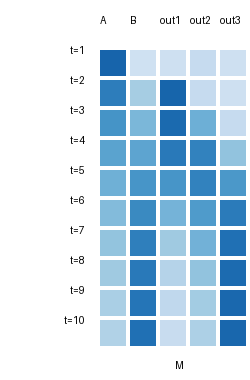

In [2]:
dinkum.reset()

m = Tissue(name='M')
a = Gene(name='A')
b = Gene(name='B')

out1 = Gene(name='out1')
out2 = Gene(name='out2')
out3 = Gene(name='out3')

a.custom2(vfg2.Decay(rate=1.2, tissue=m))
b.custom2(vfg2.Growth(rate=0.25, tissue=m))

out1.custom2(vfg2.LogisticActivator(activator_name='A'))
out2.custom2(vfg2.LogisticRepressor2(activator_name='B', repressor_name='B'))
out3.custom2(vfg2.LogisticActivator(activator_name='B'))

gene_names = vfg.get_gene_names()
display_fn, conc_df, active_df = dinkum.run_and_display_df(start=1, stop=10, gene_names=gene_names)
display_fn

Text(0, 0.5, 'level')

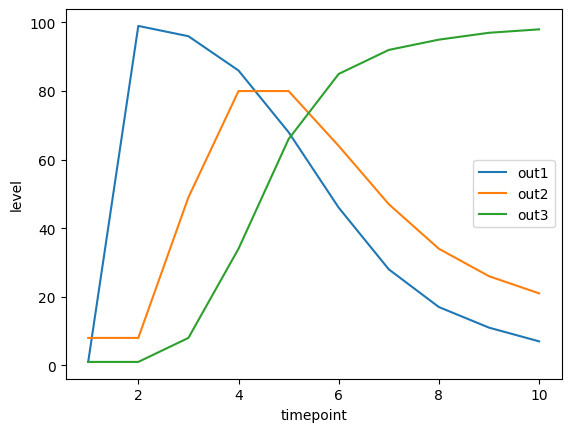

In [3]:
# now let's plot the concentrations
conc_df[['out1', 'out2', 'out3']].plot()
plt.ylabel('level')


In [8]:
# our desired pattern of expression over time:
out1_goal = vfg2.GeneTimecourse(values=[1, 1, 1], start_time=2, tissue=m)
out2_goal = vfg2.GeneTimecourse(values=[1, 1, 1], start_time=5, tissue=m)
out3_goal = vfg2.GeneTimecourse(values=[1, 1, 1], start_time=8, tissue=m)

In [9]:
vfg2.run_lmfit2(1, 10, out1=out1_goal, out2=out2_goal, out3=out3_goal, method='emcee')

found 3 genes to fit: out1, out2, out3
1 6 3
4 3 3
7 0 3
start=1 stop=10


100%|███████████████████████████████████████| 1000/1000 [00:12<00:00, 78.55it/s]

The chain is shorter than 50 times the integrated autocorrelation time for 8 parameter(s). Use this estimate with caution and run a longer chain!
N/50 = 20;
tau: [ 78.96039296  72.76153644  86.91606948  82.0585471  123.54742933
  78.4156027   81.71965376  80.94687988]
fit values:
	out1_rate: fit=62.867405200272856 (was: 61.68129451888396)
	out1_midpoint: fit=63.8133666467292 (was: 62.849635909295124)
	out2_activator_rate: fit=54.72737111717382 (was: 44.75800571503554)
	out2_activator_midpoint: fit=49.85036592632308 (was: 48.868129077263134)
	out2_repressor_rate: fit=62.01025656934323 (was: 36.7259703585769)
	out2_repressor_midpoint: fit=78.97276375953456 (was: 78.91957001556489)
	out3_rate: fit=75.94942535536556 (was: 73.06416996952858)
	out3_midpoint: fit=78.96154935655599 (was: 78.88383693131814)


start=1 stop=10


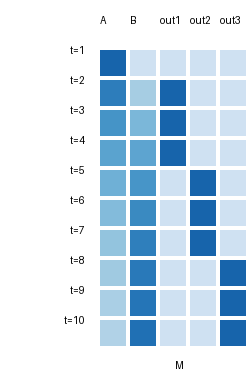

In [10]:
display_fn, conc_df, active_df = dinkum.run_and_display_df(start=1, stop=10, gene_names=gene_names)
display_fn

Text(0, 0.5, 'level')

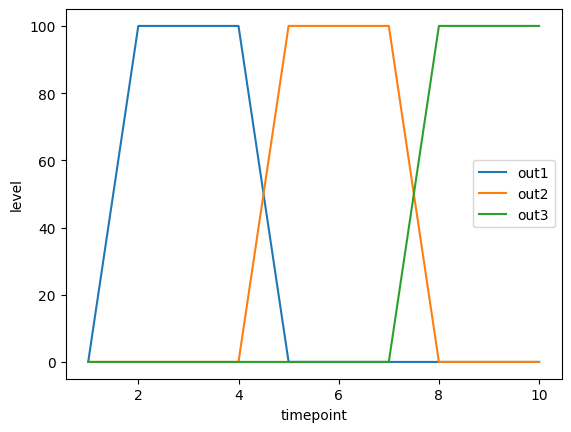

In [11]:
# now let's plot the concentrations
conc_df[['out1', 'out2', 'out3']].plot()
plt.ylabel('level')
